DATA PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#libraries to monitor performance
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from pandas.plotting import scatter_matrix
np.random.seed(2)

#READ data frame 
df_input = pd.read_csv("adult.input",header=None)
df_test = pd.read_csv("adult.test",header=None)

df_input

# #add the column names
df_input.columns = ['age','type_employer','fnlwgt','education','education_num','marital','occupation',
             'relationship','race','sex','capital_gain','capital_loss','hr_per_week','country',
             'income']
df_test.columns = ['age','type_employer','fnlwgt','education','education_num','marital','occupation',
             'relationship','race','sex','capital_gain','capital_loss','hr_per_week','country',
             'income']


INPUT DATA PREPROCCESING

In [2]:

#remove instances with the missing values "?" marker
df_input = df_input.loc[df_input["age"] != "?"]
df_input = df_input.loc[df_input["type_employer"] != "?"]
df_input = df_input.loc[df_input["fnlwgt"] != "?"]
df_input = df_input.loc[df_input["education"] != "?"]
df_input = df_input.loc[df_input["education_num"] != "?"]
df_input = df_input.loc[df_input["marital"] != "?"]
df_input = df_input.loc[df_input["occupation"] != "?"]
df_input = df_input.loc[df_input["relationship"] != "?"]
df_input = df_input.loc[df_input["race"] != "?"]
df_input = df_input.loc[df_input["sex"] != "?"]
df_input = df_input.loc[df_input["capital_gain"] != "?"]
df_input = df_input.loc[df_input["capital_loss"] != "?"]
df_input = df_input.loc[df_input["hr_per_week"] != "?"]
df_input = df_input.loc[df_input["country"] != "?"]
df_input = df_input.loc[df_input["income"] != "?"]

#df_input.shape

In [3]:
#remove attributes fnlwgt,education,relationship
#NOTE: DROPPED education_num because it was irrelevant when education atribute is prunned. \
#It also reduces the possibility of overfitting.

df_input.drop(columns=["fnlwgt","education","relationship","education_num"],inplace=True)

#df_input.shape

In [4]:
#binarization of capital gain, capital loss, and native country attributes

df_input.loc[df_input["capital_gain"] == 0,"capital_gain"] = 0
df_input.loc[df_input["capital_gain"] > 0,"capital_gain"] = 1

df_input.loc[df_input["capital_loss"] == 0,"capital_loss"] = 0
df_input.loc[df_input["capital_loss"] > 0,"capital_loss"] = 1

#TESTING
# poor_jaja = df_input.loc[df_input["capital_gain"] == 0]
# poor_jaja
# rich_jaja = df_input.loc[df_input["capital_loss"] == 1]
# rich_jaja

In [5]:
df_input["country"] = np.where(df_input["country"] == "United-States", 1, 0)

#df_input

In [6]:
#Discretization of continuous attributes [age,hours_per_week]
df_input["young"] = np.where(df_input.age.astype(int) <= 25, 1, 0)
df_input["adult"] = np.where((df_input.age.astype(int) >= 26) & (df_input.age.astype(int) <= 45), 1, 0)
df_input["senior"] = np.where((df_input.age.astype(int) >= 46) & (df_input.age.astype(int) <= 65), 1, 0)
df_input["old"] = np.where((df_input.age.astype(int) >= 66) & (df_input.age.astype(int) <= 90), 1, 0)

df_input.drop(columns=["age"],inplace=True)
#df_input

In [7]:
df_input["part_time"] = np.where(df_input.hr_per_week.astype(int) < 40, 1, 0)
df_input["full_time"] = np.where(df_input.hr_per_week.astype(int) == 40, 1, 0)
df_input["over_time"] = np.where(df_input.hr_per_week.astype(int) > 40, 1, 0)

df_input.drop(columns=["hr_per_week"],inplace=True)

# df_input

In [8]:
# Merge values and creation of new binary assymetric attributes, WORKING CLASS
# [Fed,local,stat]-> gov
# [w/o pay, never worked] -> not_working
# [Private] -> private
# [Self-inc,self-not-inc] -> self_employed

df_input["gov"] = np.where( ((df_input["type_employer"] == "Federal-gov") | (df_input["type_employer"] == "Local-gov") | (df_input["type_employer"] == "State-gov")), 1, 0)

df_input["not_working"] = np.where( ((df_input["type_employer"] == "Without-pay") | (df_input["type_employer"] == "Never-worked")), 1, 0)

df_input["private"] = np.where( (df_input["type_employer"] == "Private"), 1, 0)

df_input["self_employed"] = np.where( ((df_input["type_employer"] == "Self-emp-inc") | (df_input["type_employer"] == "Self-emp-not-inc")), 1, 0)

df_input.drop(columns=["type_employer"],inplace=True)

# df_input

In [9]:
# Merge values and creation of new binary assymetric attributes, MARITAL STATUS
# [Married-AF-spouse, Married-civ-spouse)]-> married
# [w/o pay, never worked] -> not_working
# [Never-married] -> never_married
# [Married-spouse-absent, Separated, Divorced, Widowed] -> not-married

df_input["married"] = np.where( ((df_input["marital"] == "Married-AF-spouse") | (df_input["marital"] == "Married-civ-spouse") ), 1, 0)

df_input["never_married"] = np.where( (df_input["marital"] == "Never-married" ), 1, 0)

df_input["not_married"] = np.where( ((df_input["marital"] == "Married-spouse-absent") | (df_input["marital"] == "Separated") 
| (df_input["marital"] == "Divorced") | (df_input["marital"] == "Widowed")), 1, 0)

df_input.drop(columns=["marital"],inplace=True)

# df_input

In [10]:
# Merge values and creation of new binary assymetric attributes, OCCUPATION
# [Exec-managerial]-> exec_managerial
# [Prof-specialty] -> prof_specialty
# [Tech-support, Adm-clerical, Priv-house-serv, Protective-serv, Armed-Forces, Other-service] -> other
# [Craft-repair, Farming-fishing, Handlers-cleaners, Machine-op-inspct, Transport-moving] -> manual_work
# [Sales] -> sales

df_input["exec_managerial"] = np.where( ((df_input["occupation"] == "Exec-managerial")), 1, 0)

df_input["prof_specialty"] = np.where( ((df_input["occupation"] == "Prof-specialty")), 1, 0)

df_input["other"] = np.where( ((df_input["occupation"] == "Tech-support") | (df_input["occupation"] == "Adm-clerical")
| (df_input["occupation"] == "Priv-house-serv") | (df_input["occupation"] == "Protective-serv") 
| (df_input["occupation"] == "Armed-Forces")| (df_input["occupation"] == "Other-service") ), 1, 0)

df_input["manual_work"] = np.where( ((df_input["occupation"] == "Craft-repair") | (df_input["occupation"] == "Farming-fishing") 
| (df_input["occupation"] == "Handlers-cleaners") | (df_input["occupation"] == "Machine-op-inspct") | (df_input["occupation"] == "Transport-moving")), 1, 0)

df_input["sales"] = np.where( ((df_input["occupation"] == "Sales")), 1, 0)
df_input.drop(columns=["occupation"],inplace=True)

# TESTING
# sas = df_input.loc[(df_input["exec_managerial"] == 0) & (df_input["prof_specialty"] == 0)  & (df_input["other"] == 0) & (df_input["manual_work"] == 0) & 
# (df_input["sales"] == 0)]
# sas

In [11]:
# BINARIZATION OF EXTRA ATTRIBUTES [race,sex,income]

#Where 1 means >50k , and 0 otherwise
df_input["income"] = np.where( ((df_input["income"] == ">50K")), 1, 0)

#creation of assymetric attributes for gender 
df_input["male"] = np.where( ((df_input["sex"] == "Male")), 1, 0)
df_input["female"] = np.where( ((df_input["sex"] == "Female")), 1, 0)
df_input.drop(columns=["sex"],inplace=True)

#creation of assymetric attributes for race
#print(df_input['race'].unique()) ---> ['White' 'Asian-Pac-Islander' 'Black' 'Other' 'Amer-Indian-Eskimo']
df_input["white"] = np.where( ((df_input["race"] == "White")), 1, 0)
df_input["asian"] = np.where( ((df_input["race"] == "Asian-Pac-Islander")), 1, 0)
df_input["black"] = np.where( ((df_input["race"] == "Black")), 1, 0)
df_input["other"] = np.where( ((df_input["race"] == "Other")), 1, 0)
df_input["amerindian"] = np.where( ((df_input["race"] == "Amer-Indian-Eskimo")), 1, 0)
df_input.drop(columns=["race"],inplace=True)

# TESTING
# sas = df_input.loc[(df_input["white"] ==1) & (df_input["asian"] ==1) & (df_input["black"] ==1) & (df_input["other"] ==1) & (df_input["amerindian"] ==1)]
# sas

TEST DATA PREPROCESSING

In [12]:

#Dropping irrelevent attributes
df_test.drop(columns=["fnlwgt","education","relationship","education_num","income"],inplace=True)

In [13]:
#binarization of capital gain, capital loss, and native country attributes

df_test.loc[df_test["capital_gain"] == 0,"capital_gain"] = 0
df_test.loc[df_test["capital_gain"] > 0,"capital_gain"] = 1

df_test.loc[df_test["capital_loss"] == 0,"capital_loss"] = 0
df_test.loc[df_test["capital_loss"] > 0,"capital_loss"] = 1

#TESTING
# poor_jaja = df_test.loc[df_test["capital_gain"] == 0] #896
# poor_jaja
# rich_jaja = df_test.loc[df_test["capital_gain"] == 1] #104
# rich_jaja


In [14]:
df_test["country"] = np.where(df_test["country"] == "United-States", 1, 0)
# df_test

In [15]:
#Discretization of continuous attributes [age,hours_per_week]
df_test["young"] = np.where(df_test.age.astype(int) <= 25, 1, 0)
df_test["adult"] = np.where((df_test.age.astype(int) >= 26) & (df_test.age.astype(int) <= 45), 1, 0)
df_test["senior"] = np.where((df_test.age.astype(int) >= 46) & (df_test.age.astype(int) <= 65), 1, 0)
df_test["old"] = np.where((df_test.age.astype(int) >= 66) & (df_test.age.astype(int) <= 90), 1, 0)

df_test.drop(columns=["age"],inplace=True)
# df_test

In [16]:
df_test["part_time"] = np.where(df_test.hr_per_week.astype(int) < 40, 1, 0)
df_test["full_time"] = np.where(df_test.hr_per_week.astype(int) == 40, 1, 0)
df_test["over_time"] = np.where(df_test.hr_per_week.astype(int) > 40, 1, 0)

df_test.drop(columns=["hr_per_week"],inplace=True)

# df_test

In [17]:
# Merge values and creation of new binary assymetric attributes, WORKING CLASS
# [Fed,local,stat]-> gov
# [w/o pay, never worked] -> not_working
# [Private] -> private
# [Self-inc,self-not-inc] -> self_employed

df_test["gov"] = np.where( ((df_test["type_employer"] == "Federal-gov") | (df_test["type_employer"] == "Local-gov") | (df_test["type_employer"] == "State-gov")), 1, 0)

df_test["not_working"] = np.where( ((df_test["type_employer"] == "Without-pay") | (df_test["type_employer"] == "Never-worked")), 1, 0)

df_test["private"] = np.where( (df_test["type_employer"] == "Private"), 1, 0)

df_test["self_employed"] = np.where( ((df_test["type_employer"] == "Self-emp-inc") | (df_test["type_employer"] == "Self-emp-not-inc")), 1, 0)

df_test.drop(columns=["type_employer"],inplace=True)

# df_test

In [18]:
# Merge values and creation of new binary assymetric attributes, MARITAL STATUS
# [Married-AF-spouse, Married-civ-spouse)]-> married
# [w/o pay, never worked] -> not_working
# [Never-married] -> never_married
# [Married-spouse-absent, Separated, Divorced, Widowed] -> not-married

df_test["married"] = np.where( ((df_test["marital"] == "Married-AF-spouse") | (df_test["marital"] == "Married-civ-spouse") ), 1, 0)

df_test["never_married"] = np.where( (df_test["marital"] == "Never-married" ), 1, 0)

df_test["not_married"] = np.where( ((df_test["marital"] == "Married-spouse-absent") | (df_test["marital"] == "Separated") 
| (df_test["marital"] == "Divorced") | (df_test["marital"] == "Widowed")), 1, 0)

df_test.drop(columns=["marital"],inplace=True)

# df_test

In [19]:
# Merge values and creation of new binary assymetric attributes, OCCUPATION
# [Exec-managerial]-> exec_managerial
# [Prof-specialty] -> prof_specialty
# [Tech-support, Adm-clerical, Priv-house-serv, Protective-serv, Armed-Forces, Other-service] -> other
# [Craft-repair, Farming-fishing, Handlers-cleaners, Machine-op-inspct, Transport-moving] -> manual_work
# [Sales] -> sales

df_test["exec_managerial"] = np.where( ((df_test["occupation"] == "Exec-managerial")), 1, 0)

df_test["prof_specialty"] = np.where( ((df_test["occupation"] == "Prof-specialty")), 1, 0)

df_test["other"] = np.where( ((df_test["occupation"] == "Tech-support") | (df_test["occupation"] == "Adm-clerical")
| (df_test["occupation"] == "Priv-house-serv") | (df_test["occupation"] == "Protective-serv") 
| (df_test["occupation"] == "Armed-Forces")| (df_test["occupation"] == "Other-service") ), 1, 0)

df_test["manual_work"] = np.where( ((df_test["occupation"] == "Craft-repair") | (df_test["occupation"] == "Farming-fishing") 
| (df_test["occupation"] == "Handlers-cleaners") | (df_test["occupation"] == "Machine-op-inspct") | (df_test["occupation"] == "Transport-moving")), 1, 0)

df_test["sales"] = np.where( ((df_test["occupation"] == "Sales")), 1, 0)
df_test.drop(columns=["occupation"],inplace=True)

# TESTING
# sas = df_test.loc[(df_test["exec_managerial"] == 0) & (df_test["prof_specialty"] == 0)  & (df_test["other"] == 0) & (df_test["manual_work"] == 0) & 
# (df_test["sales"] == 0)]
# sas

In [20]:
# BINARIZATION OF EXTRA ATTRIBUTES [race,sex] 

#creation of assymetric attributes for gender 
df_test["male"] = np.where( ((df_test["sex"] == "Male")), 1, 0)
df_test["female"] = np.where( ((df_test["sex"] == "Female")), 1, 0)
df_test.drop(columns=["sex"],inplace=True)

#creation of assymetric attributes for race
#print(df_test['race'].unique()) ---> ['White' 'Asian-Pac-Islander' 'Black' 'Other' 'Amer-Indian-Eskimo']
df_test["white"] = np.where( ((df_test["race"] == "White")), 1, 0)
df_test["asian"] = np.where( ((df_test["race"] == "Asian-Pac-Islander")), 1, 0)
df_test["black"] = np.where( ((df_test["race"] == "Black")), 1, 0)
df_test["other"] = np.where( ((df_test["race"] == "Other")), 1, 0)
df_test["amerindian"] = np.where( ((df_test["race"] == "Amer-Indian-Eskimo")), 1, 0)
df_test.drop(columns=["race"],inplace=True)

# TESTING
# sas = df_test.loc[(df_test["white"] ==1) & (df_test["asian"] ==1) & (df_test["black"] ==1) & (df_test["other"] ==1) & (df_test["amerindian"] ==1)]
# sas

In [21]:
# df_test has 28 columns because We dropped the income columns as it is the one to be predicted
print("INPUT DATA: ",df_input.shape)
print("TEST  DATA: ",df_test.shape)

INPUT DATA:  (3700, 29)
TEST  DATA:  (1000, 28)


TRAINING AND MODEL SELECTION (PERCEPTRON/SIMPLE)

In [22]:
X = df_input.drop(columns=["income"])
Y = df_input["income"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.3)

In [23]:
# model = Perceptron(max_iter=40, eta0=0.1, random_state=2)
# model.fit(x_train,y_train)

In [24]:
# prediction = model.predict(x_test)
# print('Accuracy: %.2f' % accuracy_score(y_test, prediction))
# ACCURACY ≈ 59%

In [25]:
#SIMPLE VISUALIZATIONS
# svc = SVC(random_state=2)
# svc.fit(x_train, y_train)

# svc_disp = RocCurveDisplay.from_estimator(svc, x_test, y_test)

TRAINING AND MODEL SELECTION (PERCEPTRON/HYPERAMETER TWEAKING)

In [26]:
#MODEL 1
#MODEL 1 ==> max_iter(30), eta0(1)

# model1 = Perceptron(max_iter=30, eta0=1)
# model1.fit(x_train,y_train)
# prediction1 = model1.predict(x_test)

# print('Accuracy:  %.2f%%' % (accuracy_score(y_test, prediction1)*100))
# # ACCURACY ≈ 77.9% 

In [27]:
#MODEL 2
#MODEL 2 ==> max_iter(20), eta0(1.2)

# model2 = Perceptron(max_iter=20, eta0=1.2)
# model2.fit(x_train,y_train)
# prediction2 = model2.predict(x_test)

# print('Accuracy: %.2f%%' % (accuracy_score(y_test, prediction2)*100))
# ACCURACY ≈ 77.21%

In [28]:
#MODEL 3
#MODEL 3 ==> max_iter(35), eta0(.1)

# model3 = Perceptron(max_iter=35, eta0=.1)
# model3.fit(x_train,y_train)
# prediction3 = model3.predict(x_test)

# print('Accuracy: %.2f%%' % (accuracy_score(y_test, prediction3)*100))
# ACCURACY ≈ 75.59%

In [29]:
#MODEL 4
#MODEL 4 ==> max_iter(500), eta0(1)

# model4 = Perceptron(max_iter=500, eta0=1)
# model4.fit(x_train,y_train)
# prediction4 = model4.predict(x_test)

# print('Accuracy: %.2f%%' % (accuracy_score(y_test, prediction4)*100))
# ACCURACY ≈ 77.93%

TRAINING AND MODEL SELECTION (PERCEPTRON/ADVANCED HYPERAMETER TWEAKING)

In [30]:
#MODEL 5
#MODEL 5 ==> max_iter(500), eta0(1),val_fraction(.25),earlt_stopping(True)

model5 = Perceptron(max_iter=500, eta0=1,validation_fraction=.25,early_stopping=True)
model5.fit(x_train,y_train)
prediction5 = model5.predict(x_test)

# print('Accuracy: %.2f%%' % (accuracy_score(y_test, prediction5)*100))
# # ACCURACY ≈ 79.19% ==>BEST PERFORMANCE

In [31]:
#MODEL 6
#MODEL 6 ==> max_iter(500), eta0(.1),val_fraction(.25),earlt_stopping(True)

# model6 = Perceptron(max_iter=1500, eta0=1,validation_fraction=.25,early_stopping=True)
# model6.fit(x_train,y_train)
# prediction6 = model6.predict(x_test)

# print('Accuracy: %.2f%%' % (accuracy_score(y_test, prediction6)*100))
# # ACCURACY ≈ 76% 

MODEL EVALUATION (OUTPUT)

In [32]:
#print model accuracy
print("MODEL ACCURACY %.2f%%" % (accuracy_score(y_test, prediction5)*100))

#output of classification report of a random sample
#because the model was using cross validiton

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state=2)
predictions_set = model5.predict(X_test)
target_names = ["<=50",">50"]
print("CLASSIFICATION REPORT\n",classification_report(Y_test, predictions_set,target_names=target_names))

#Predict the test data, and creating a csv file
predictions_test = model5.predict(df_test)
np.savetxt('pred_perc_2.csv',predictions_test,fmt='%.0d',delimiter=',')

MODEL ACCURACY 79.19%
CLASSIFICATION REPORT
               precision    recall  f1-score   support

        <=50       0.83      0.82      0.82       571
         >50       0.71      0.72      0.72       354

    accuracy                           0.78       925
   macro avg       0.77      0.77      0.77       925
weighted avg       0.78      0.78      0.78       925



<AxesSubplot:xlabel='Model number', ylabel='Misclasification error'>

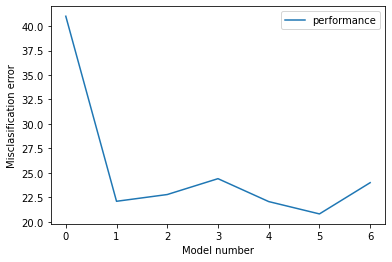

In [33]:
#Prediction visulizations
# performance = {'performance':[(100-59),(100-77.9),(100-77.21),(100-75.59),(100- 77.93),(100-79.19),(100-76)]}
# performance_df = pd.DataFrame(data=performance)
# performance_df.plot(xlabel="Model number",ylabel="Misclasification error")